# **Machine Problem No. 4**

**Exercise 1: Setting Up the Environment**

**Install libraries:**

In [1]:
!pip install pgmpy pandas networkx matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.2 MB/s eta 0:00:00


**Import the libraries**

In [2]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

**Exercise 2: Define the Bayesian Network Structure**

Define the structure:


In [3]:
model = BayesianNetwork([
    ('Age', 'Heart Disease'),
    ('Smoking', 'Heart Disease'),
    ('Exercise', 'Heart Disease'),
    ('Cholesterol', 'Heart Disease'),
    ('Blood Pressure', 'Heart Disease'),
    ('Heart Disease', 'Chest Pain'),
    ('Heart Disease', 'ECG Result')
])


**Exercise 3: Define Conditional Probability Tables (CPTs)**

Create CPTs (using hypothetical values):


In [5]:
cpd_age = TabularCPD(variable='Age', variable_card=3, values=[[0.3], [0.5], [0.2]])
cpd_smoking = TabularCPD(variable='Smoking', variable_card=2, values=[[0.4], [0.6]])
cpd_exercise = TabularCPD(variable='Exercise', variable_card=2, values=[[0.7], [0.3]])
cpd_cholesterol = TabularCPD(variable='Cholesterol', variable_card=2, values=[[0.5], [0.5]])
cpd_bp = TabularCPD(variable='Blood Pressure', variable_card=2, values=[[0.4], [0.6]])

cpd_hd = TabularCPD(
    variable='Heart Disease', variable_card=2,
    values=[[0.8, 0.6, 0.7, 0.9, 0.3, 0.2, 0.4, 0.1, 0.8, 0.6, 0.7, 0.9, 0.3, 0.2, 0.4, 0.1, 0.8, 0.6, 0.7, 0.9, 0.3, 0.2, 0.4, 0.1, 0.8, 0.6, 0.7, 0.9, 0.3, 0.2, 0.4, 0.1, 0.8, 0.6, 0.7, 0.9, 0.3, 0.2, 0.4, 0.1, 0.8, 0.6, 0.7, 0.9, 0.3, 0.2, 0.4, 0.1],
            [0.2, 0.4, 0.3, 0.1, 0.7, 0.8, 0.6, 0.9, 0.2, 0.4, 0.3, 0.1, 0.7, 0.8, 0.6, 0.9, 0.2, 0.4, 0.3, 0.1, 0.7, 0.8, 0.6, 0.9, 0.2, 0.4, 0.3, 0.1, 0.7, 0.8, 0.6, 0.9, 0.2, 0.4, 0.3, 0.1, 0.7, 0.8, 0.6, 0.9, 0.2, 0.4, 0.3, 0.1, 0.7, 0.8, 0.6, 0.9]],
    evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'Blood Pressure'],
    evidence_card=[3, 2, 2, 2, 2]
)

cpd_cp = TabularCPD(variable='Chest Pain', variable_card=2,
                    values=[[0.7, 0.2], [0.3, 0.8]],
                    evidence=['Heart Disease'], evidence_card=[2])

cpd_ecg = TabularCPD(variable='ECG Result', variable_card=2,
                     values=[[0.9, 0.2], [0.1, 0.8]],
                     evidence=['Heart Disease'], evidence_card=[2])

model.add_cpds(cpd_age, cpd_smoking, cpd_exercise, cpd_cholesterol, cpd_bp, cpd_hd, cpd_cp, cpd_ecg)


**Exercise 4: Inference in the Bayesian Network**

Perform probabilistic inference:



In [6]:
inference = VariableElimination(model)

q1 = inference.query(variables=['Heart Disease'],
                     evidence={'Age': 1, 'Smoking': 0, 'Cholesterol': 0, 'Blood Pressure': 1})
print(q1)

q2 = inference.query(variables=['ECG Result'], evidence={'Chest Pain': 1})
print(q2)


+------------------+----------------------+
| Heart Disease    |   phi(Heart Disease) |
+==================+======================+
| Heart Disease(0) |               0.4800 |
+------------------+----------------------+
| Heart Disease(1) |               0.5200 |
+------------------+----------------------+
+---------------+-------------------+
| ECG Result    |   phi(ECG Result) |
+===============+===================+
| ECG Result(0) |            0.4480 |
+---------------+-------------------+
| ECG Result(1) |            0.5520 |
+---------------+-------------------+


Posterior probability analysis:

In [7]:
q3 = inference.query(variables=['Heart Disease'], evidence={'Exercise': 1})
print(q3)


+------------------+----------------------+
| Heart Disease    |   phi(Heart Disease) |
+==================+======================+
| Heart Disease(0) |               0.2300 |
+------------------+----------------------+
| Heart Disease(1) |               0.7700 |
+------------------+----------------------+


**Exercise 5: Parameter Learning from Simulated Data**

Generate synthetic dataset:



In [8]:
import random
import numpy as np

num_patients = 1000
data = pd.DataFrame({
    'Age': np.random.choice([0, 1, 2], size=num_patients, p=[0.3, 0.5, 0.2]),
    'Smoking': np.random.choice([0, 1], size=num_patients, p=[0.4, 0.6]),
    'Exercise': np.random.choice([0, 1], size=num_patients, p=[0.7, 0.3]),
    'Cholesterol': np.random.choice([0, 1], size=num_patients, p=[0.5, 0.5]),
    'Blood Pressure': np.random.choice([0, 1], size=num_patients, p=[0.4, 0.6]),
    'Heart Disease': np.random.choice([0, 1], size=num_patients, p=[0.8, 0.2]),
    'Chest Pain': np.random.choice([0, 1], size=num_patients, p=[0.7, 0.3]),
    'ECG Result': np.random.choice([0, 1], size=num_patients, p=[0.9, 0.1])
})

print(data.head())


   Age  Smoking  Exercise  Cholesterol  Blood Pressure  Heart Disease  \
0    1        0         0            0               0              0   
1    1        1         0            0               0              1   
2    0        0         0            0               1              0   
3    0        0         0            1               1              0   
4    0        0         1            1               1              0   

   Chest Pain  ECG Result  
0           0           0  
1           0           0  
2           0           1  
3           0           1  
4           0           0  


Estimate CPTs using Maximum Likelihood Estimation:



In [9]:
from pgmpy.estimators import MaximumLikelihoodEstimator

model.fit(data, estimator=MaximumLikelihoodEstimator)


**Exercise 6: Network Visualization and Sensitivity Analysis**

Visualize the network:



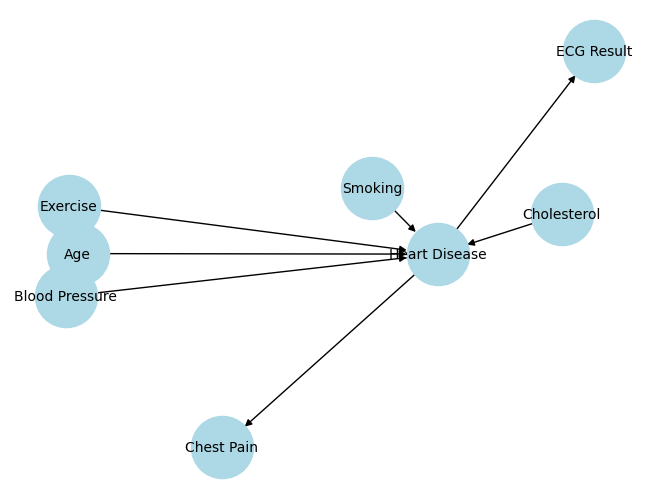

In [14]:
import networkx as nx

edges = model.edges()

nx_graph = nx.DiGraph()

nx_graph.add_edges_from(edges)

nx.draw(nx_graph, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_color='black')
plt.show()



Sensitivity analysis:



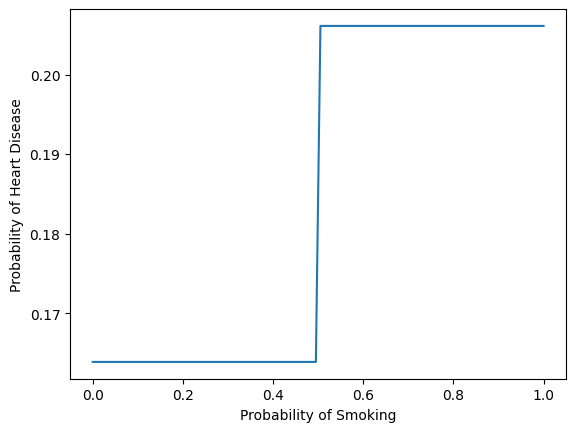

In [15]:
import matplotlib.pyplot as plt

smoking_effects = []
for p_smoking in np.linspace(0, 1, 100):
    inference = VariableElimination(model)
    smoking_effects.append(inference.query(variables=['Heart Disease'],
                                           evidence={'Smoking': int(p_smoking > 0.5)}).values[1])

plt.plot(np.linspace(0, 1, 100), smoking_effects)
plt.xlabel('Probability of Smoking')
plt.ylabel('Probability of Heart Disease')
plt.show()
